In [ ]:
import pandas as pd

# Load the dataset
try:
    df = pd.read_csv('train.csv')
    print("Dataset loaded successfully.")
    display(df.head())
except FileNotFoundError:
    print("Error: 'train.csv' not found. Please upload")

Dataset loaded successfully.


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Identify missing values
print("Missing values before handling:")
print(df.isnull().sum())

# Handle missing values in 'Age' using mean substitution
df['Age'].fillna(df['Age'].mean(), inplace=True)

# Handle missing values in 'Embarked' using mode substitution
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# For 'Cabin', we can see there are many missing values.
# fill with a placeholder like 'Unknown'.
df['Cabin'].fillna('Unknown', inplace=True)

print("\nMissing values after handling:")
print(df.isnull().sum())

Missing values before handling:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Missing values after handling:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


/tmp/ipython-input-3884582634.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
/tmp/ipython-input-3884582634.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

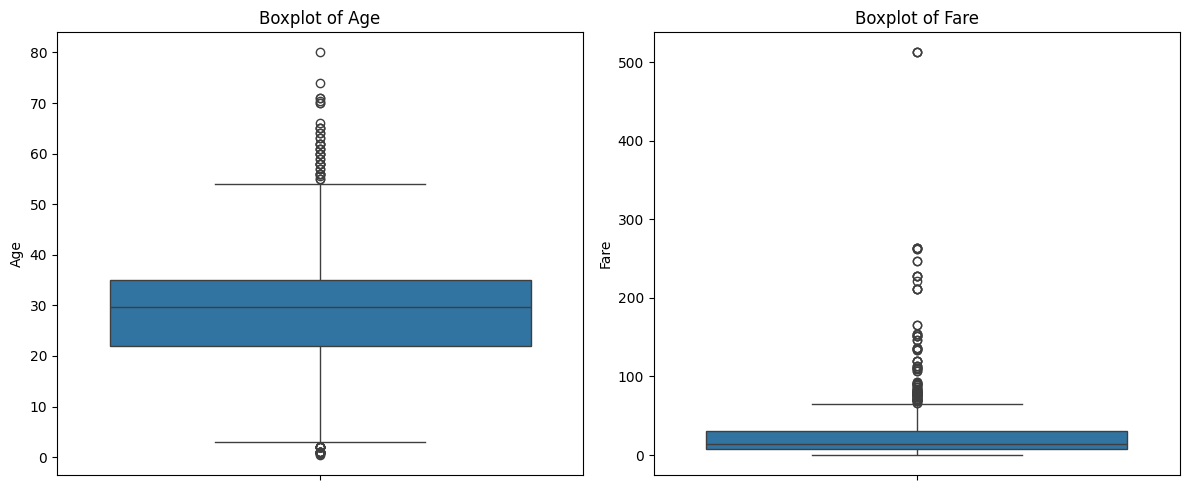

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the outliers using boxplots
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(y=df['Age'])
plt.title('Boxplot of Age')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['Fare'])
plt.title('Boxplot of Fare')

plt.tight_layout()
plt.show()

In [7]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Apply Min-Max Normalization to the Fare column
scaler_minmax = MinMaxScaler()
df['Fare_normalized_minmax'] = scaler_minmax.fit_transform(df[['Fare']])

# Apply Z-score Normalization to the Age column
scaler_zscore = StandardScaler()
df['Age_normalized_zscore'] = scaler_zscore.fit_transform(df[['Age']])

print("Normalized columns added to the DataFrame.")
display(df[['Fare', 'Fare_normalized_minmax', 'Age', 'Age_normalized_zscore']].head())

Normalized columns added to the DataFrame.


,Fare,Fare_normalized_minmax,Age,Age_normalized_zscore
0,7.2500,0.014151,22.0,-0.592481
1,71.2833,0.139136,38.0,0.638789
2,7.9250,0.015469,26.0,-0.284663
3,53.1000,0.103644,35.0,0.407926
4,8.0500,0.015713,35.0,0.407926


In [8]:
# Create a new feature 'is_child'
df['is_child'] = (df['Age'] < 16).astype(int)

print("'is_child' column created.")
display(df[['Age', 'is_child']].head())

'is_child' column created.


,Age,is_child
0,22.0,0
1,38.0,0
2,26.0,0
3,35.0,0
4,35.0,0


In [ ]:
# Convert the Sex column into binary numeric format ie (Male = 1, Female = 0)
df['Sex'] = df['Sex'].map({'male': 1, 'female': 0})

# Encode Embarked using dummy substitution (UNKNOWN for missing values)
# We've already filled missing Embarked values with the mode, so we don't need to handle UNKNOWN explicitly here,
# but the dummy encoding will create columns for each category.
df = pd.get_dummies(df, columns=['Embarked'], prefix='Embarked')

print("Categorical variables encoded.")
display(df[['Sex', 'Embarked_C', 'Embarked_Q', 'Embarked_S']].head())

Categorical variables encoded.


,Sex,Embarked_C,Embarked_Q,Embarked_S
0,1,False,False,True
1,0,True,False,False
2,0,False,False,True
3,0,False,False,True
4,1,False,False,True


In [10]:
# Down-sample features - keep only the specified columns
# We need to include the new Embarked dummy columns
selected_features = ['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'is_child',
                     'Embarked_C', 'Embarked_Q', 'Embarked_S']

df_clean = df[selected_features].copy()

print("Dataset down-sampled to selected features.")
display(df_clean.head())

Dataset down-sampled to selected features.


,Survived,Pclass,Sex,Age,Fare,is_child,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,7.2500,0,False,False,True
1,1,1,0,38.0,71.2833,0,True,False,False
2,1,3,0,26.0,7.9250,0,False,False,True
3,1,1,0,35.0,53.1000,0,False,False,True
4,0,3,1,35.0,8.0500,0,False,False,True


In [ ]:
# Save the cleaned dataset to a CSV file
df_clean.to_csv('titanic_clean.csv', index=False)

print("Cleaned dataset saved to 'titanic_clean.csv'.")

Cleaned dataset saved to 'titanic_clean.csv'.
